<font color='seagreen'>


# Week 5 -- Real Gas Radiative Transfer

*Please finish and submit this project before the start of class on 4 October 2017.*

This week we will build on the radiative transfer tools and expertise you developed last week, applying them to real gas and real opacities. It's through tools like these that we can connect remote sensing observations to the physics and chemistry of distant planets. I'd like you to see what some of the core steps would be!

In [23]:
import matplotlib.pyplot as plt, numpy as np
import astropy.units as u, astropy.constants as c
import seaborn as sns
import spectroscopy as spec

sns.set_context('talk')
sns.set_style('darkgrid')

<font color='seagreen'>
### Q1: HITRAN

The [HITRAN database](http://hitran.org) compiles line lists for common molecules, and is a very useful resource for thinking about spectroscopy and remote sensing of planetary atmospheres. The [HITRAN Application Programming Interface](http://hitran.org/hapi/) provides handy tools for accessing this database through Python.

In [3]:
# import tools for interacting with HITRAN
import hapi

HAPI version: 1.1.0.7
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are available at http://hitran.org/suppl/TIPS/
           To use them in HAPI ver. 1.1.0.7, use partitionFunction parameter of the absorptionCoefficient_ routine.

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


<font color='seagreen'>
I've written a few cells to get you started here. If you have more questions on what's going on with `hapi`, check out the [hapi manual](http://hitran.org/static/hapi/hapi_manual.pdf) or the `hapi.getHelp()` built-in documentation. The standard `jupyter` tricks of `hapi.<tab>` or `hapi.fetch?` work, as usual, for investigating individual functions.

<font color='seagreen'>
***Set up a local database.*** To use HITRAN data, you need to start a HITRAN database running on your computer. In effect, this is really just a folder where `hapi` will download and store data. 

In [4]:
# hapi will download data to your computer; this sets up a directory for it
hapi.db_begin('hitran_data')

Using hitran_data

CO2
                     Lines parsed: 170103


<font color='seagreen'>
***See what molecules are available.*** HITRAN has data on only so many molecules. They are indexed according to a molecule number `M`. This code lists the molecules stored in their database:

In [5]:
print("  M | molecule\n  ------------")
for M in np.arange(1,48):
    try:
        print('{:3} | {}'.format(M, hapi.moleculeName(M)))
    except KeyError:
        print('{:3} | (not found)'.format(M))

  M | molecule
  ------------
  1 | H2O
  2 | CO2
  3 | O3
  4 | N2O
  5 | CO
  6 | CH4
  7 | O2
  8 | NO
  9 | SO2
 10 | NO2
 11 | NH3
 12 | HNO3
 13 | OH
 14 | HF
 15 | HCl
 16 | HBr
 17 | HI
 18 | ClO
 19 | OCS
 20 | H2CO
 21 | HOCl
 22 | N2
 23 | HCN
 24 | CH3Cl
 25 | H2O2
 26 | C2H2
 27 | C2H6
 28 | PH3
 29 | COF2
 30 | (not found)
 31 | H2S
 32 | HCOOH
 33 | HO2
 34 | O
 35 | (not found)
 36 | NOp
 37 | HOBr
 38 | C2H4
 39 | CH3OH
 40 | CH3Br
 41 | CH3CN
 42 | CF4
 43 | C4H2
 44 | HC3N
 45 | H2
 46 | CS
 47 | SO3


<font color='seagreen'>
***Download some data.***
To access HITRAN's line data for $CO_2$, we can use the `fetch` command. This will download two files (`CO2.data` and `CO2.header`) into your database directory; for the $CO_2$ lines between $1-100 \mu m$, the `CO2.data` file should be about 26MB in size.

In [6]:
print("Let's download some data for CO2.")

# give a name to this table you're downloading (you can set it to anything!)
nameoftable = 'CO2' 

# this integer refers to the molecule number in the HITRAN database
molecule = 2 

# which isotopologue to download (1 = the most abundant on Earth)
isotopologue = 1 

 # the minimum wavenumber to include
wavenumber_min = 1/(100*u.micron).to('cm').value

# the maximum wavenumber to include
wavenumber_max = 1/(1*u.micron).to('cm').value 

# download the data to a folder on your computer
hapi.fetch(nameoftable, molecule, isotopologue, wavenumber_min, wavenumber_max) 

Let's download some data for CO2.

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran

  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_da

  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_data/CO2.data
  65536 bytes written to hitran_da

<font color='seagreen'>
***Calculate absorption coefficients.*** The data you downloaded was really just a list of $CO_2$ line strengths, line centers, line shape parameters at standard temperature and pressure ($T = 296~K$ and $P = 1~atm = 1.01325~bar$). The nitty gritty details of what you downloaded are listed [here.](http://hitran.org/docs/definitions-and-units/); the table contains enough information to estimate the line strengths and profiles at a range of temperatures and pressures. `hapi` provides handy functions to calculate absorption coefficients from these line data, effectively adding together a bunch of Voigt profiles.

In [7]:
# include molecule = 2, isotopologue = 1
moleculestoinclude = [(2,1)] 

# what table should the data come from?
tabletouse = 'CO2'

# what range of wavenumbers to consider?
wavenumber_min = 1/(100*u.micron).to('cm').value
wavenumber_max = 1/(1*u.micron).to('cm').value 
minmax_wn = [wavenumber_min, wavenumber_max]

# what wavenumber spacing should be used?
step_wn = 0.01

# calculate an array of absorption coefficients
wavenumber, crosssection = hapi.absorptionCoefficient(Components=moleculestoinclude, 
                                                      SourceTables=tabletouse,
                                                      WavenumberRange=minmax_wn,
                                                      WavenumberStep=step_wn)


/home/girish/astr5810/gmd_week05_notebook/hapi.py:10351: UserWarning: To get the most up-to-date version please check http://hitran.org/hapi
  warn('To get the most up-to-date version please check http://hitran.org/hapi')


In [8]:
print(wavenumber)

[   100.      100.01    100.02 ...,   9999.98   9999.99  10000.  ]


<font color='seagreen'>
***Plot the absorption coefficients.*** Let's plot these absorption coefficients, on both a linear and logarithm scale (because there's interesting stuff to see on both).

In [9]:
# this "magic command" makes plots interactive in jupyter, so you can zoom
%matplotlib notebook
# Watch out! -- If you use this for interactive plotting,
# you'll need to explicitly create a new figure for each
# plot you make, either with `plt.figure()` or with 
# the `plt.subplots()` command seen here.

# create a multipanel plot
fi, ax = plt.subplots(2,1, sharex=True, figsize=(10, 6))

# make a linear scale plot on the top
plt.sca(ax[0])
plt.plot(wavenumber, crosssection)
plt.ylabel('Cross-Section (cm$^2$)')
plt.title('$CO_2$ at (T,p) = (296 K,p=1 atm)')

# make a log scale plot on the bottom
plt.sca(ax[1])
plt.plot(wavenumber, crosssection)
plt.yscale('log')
plt.xlabel('Wavenumber (1/cm)')
plt.ylabel('Cross-Section (cm$^2$)')

# (on the interactive plot, 
#      the square allow you to select a region to zoom to
#      the house resets the zoom settings
#      the floppy disk allows you to save the plot to a file

<IPython.core.display.Javascript object>

<font color='seagreen'>
***Now, let's do some science!*** With the ingredients you've seen so far, we can now put together a slightly more realistic model of radiation through a planet's atmosphere. 

1. Remake the above plot of the absorption cross-section $\sigma_\lambda$ as function of wavelength $\lambda$ (in $[\mu m]$). 
+ Make a plot of the mass opacity $\kappa_\lambda$ vs. $\lambda$. Please note that the absorption coefficient HITRAN returns is a cross-section in $[cm^2/molecule]$, not the mass opacity $[m^2/kg]$ we've been using in our radiative transfer code. 
+ Plot the pressure where $\tau_\lambda = 1$ (as a function of $\lambda$), given a pure $CO_2$ atmosphere with the absorption coefficients you've estimated. Assume a surface gravity of $10~m/s^2$. Plot $P$ on the vertical axis, with lower pressures at the top. 
+ Now, let's imagine this planet has a vaguely Earth-like equilibrium temperature of $T_{\rm eq} = T_{\rm eff} = 250K$. Construct a $T-P$ profile based on the cartoon we discussed in class, where the temperature is constant at $T_{\rm skin}$ at altitudes above some radiative-convective boundary $P_{\rm rc}$ and the *potential* temperature is constant for altitudes below this boundary. Assume $P_{\rm rc} = 0.1~bar$, and that $\gamma = c_{\rm p}/c_{\rm v} = 1.3$. Plot this $T-P$ profile, for altitudes spanning $P = 10^{-8}-10^{2}~bar$.
+ Make a prediction and write it down (it's OK if it's wrong!). If you were to calculate the radiative transfer through this atmosphere (keeping the $T-P$ profile fixed), roughly what brightness temperature would you expect to see at $15~\mu m$, at $20~\mu m$, and at $25~\mu m$? Assume the surface pressure is $100~bar$.
+ Test your predictions. Use your radiative transfer code from Week 04 to calculate the thermal emission spectrum for this planet, assuming a surface pressure of $100~bar$. Plot this spectrum, along with Planck $B_\lambda(T)$ intensity spectra for the skin temperature $T_{\rm skin}$ and the surface temperature $T_{\rm surf}$, on a log-log scale. I *very* strongly recommend not doing this at the full resolution of your arrays (990001 wavelengths); make a crude approximation and only calculate outgoing intensities at a tiny subset of these (maybe 100-1000 wavelengths). How did your $(15, 20, 25)~\mu m$ predictions fare?
+ Pick any other molecule out of the HITRAN list, download its line list, and make a plot comparing its absorption cross section to that of $CO_2$. Would your molecule be a stronger or weaker greenhouse gas (molecule-to-molecule) than $CO_2$ (for temperature equilbrium temperatures around $250~K$)?


<IPython.core.display.Javascript object>


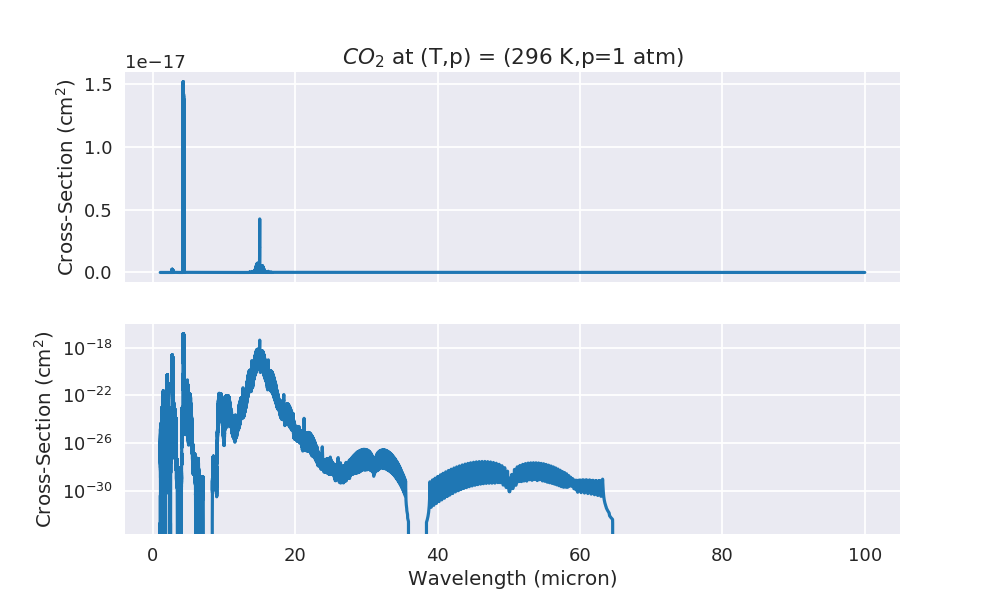

In [22]:
fi, ax = plt.subplots(2,1, sharex=True, figsize=(10, 6))

# make a linear scale plot on the top
plt.sca(ax[0])
plt.plot(1.0e4/wavenumber, crosssection)
plt.ylabel('Cross-Section (cm$^2$)')
plt.title('$CO_2$ at (T,p) = (296 K,p=1 atm)')

# make a log scale plot on the bottom
plt.sca(ax[1])
plt.plot(1.0e4/wavenumber, crosssection)
plt.yscale('log')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Cross-Section (cm$^2$)')

<IPython.core.display.Javascript object>


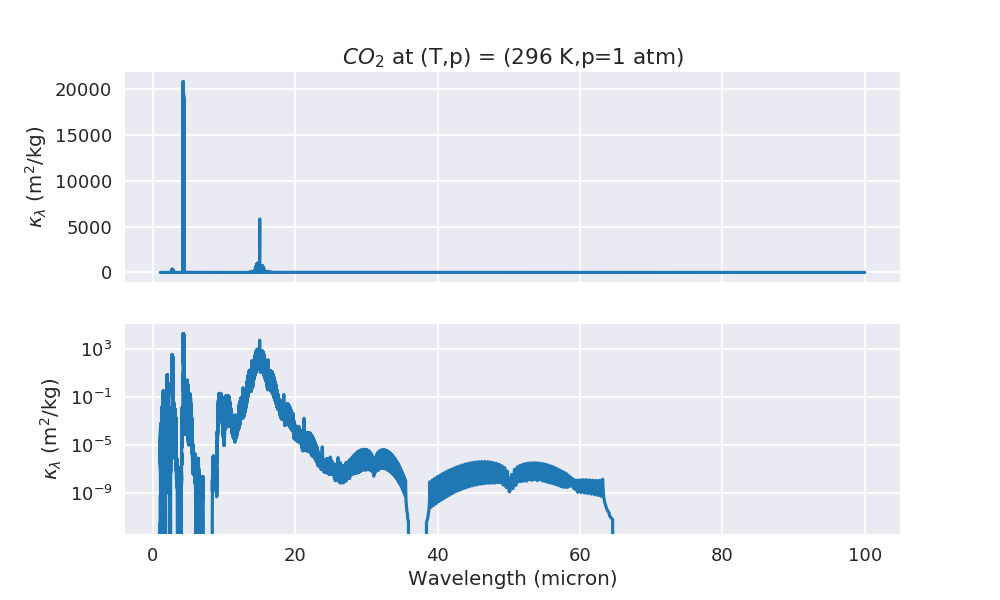

In [20]:
fi, ax = plt.subplots(2,1, sharex=True, figsize=(10, 6))

mass_per_molecule = (7.31e-26)*u.kg
mass_opacity = ((crosssection*(u.cm**2.0))/mass_per_molecule).to((u.m**2.0)/u.kg)
# make a linear scale plot on the top
plt.sca(ax[0])
plt.plot(1.0e4/wavenumber, mass_opacity)
plt.ylabel('$\kappa_\lambda$ (m$^2$/kg)')
plt.title('$CO_2$ at (T,p) = (296 K,p=1 atm)')

# make a log scale plot on the bottom
plt.sca(ax[1])
plt.plot(1.0e4/wavenumber, mass_opacity)
plt.ylabel('$\kappa_\lambda$ (m$^2$/kg)')
plt.yscale('log')
plt.xlabel('Wavelength (micron)')

<IPython.core.display.Javascript object>


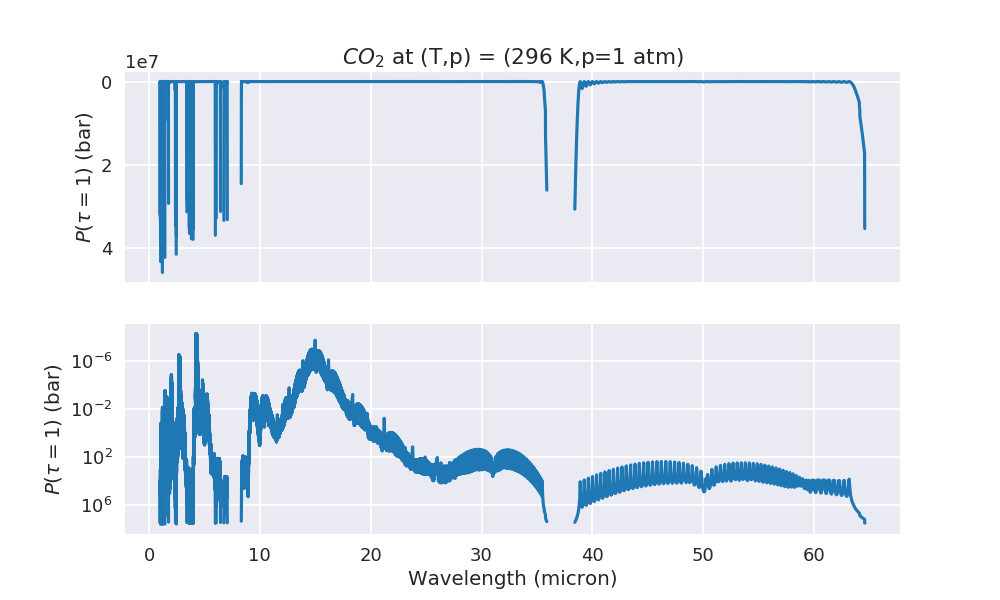

/home/girish/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/units/quantity.py:641: RuntimeWarning: divide by zero encountered in true_divide
  *arrays, **kwargs)


In [21]:
fi, ax = plt.subplots(2,1, sharex=True, figsize=(10, 6))

surf_grav = 10.0*(u.m)/(u.s**2.0)
pressure_tau_1 = (surf_grav/mass_opacity).to(u.bar)
# make a linear scale plot on the top
plt.sca(ax[0])
plt.plot(1.0e4/wavenumber, pressure_tau_1)
plt.ylabel(r'$P(\tau = 1)$ (bar)')
plt.title('$CO_2$ at (T,p) = (296 K,p=1 atm)')

# make a log scale plot on the bottom
plt.sca(ax[1])
plt.plot(1.0e4/wavenumber, pressure_tau_1)
plt.ylabel(r'$P(\tau = 1)$ (bar)')
plt.yscale('log')
plt.xlabel('Wavelength (micron)')
for axis in ax:
    axis.invert_yaxis()

<IPython.core.display.Javascript object>


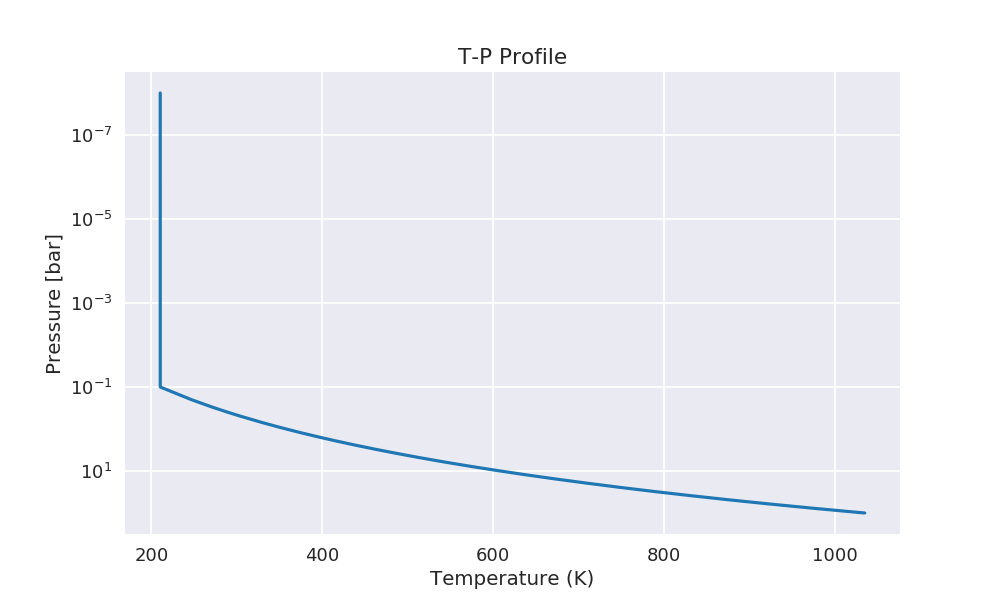

In [52]:
eq_temp = 250.0*u.K
skin_temp = (2.0**(-0.25))*eq_temp
gamma_exp = 1.0 - (1.0/1.3)
const_theta = skin_temp*(10.0**gamma_exp)
press_arr = np.linspace(1.0e-8, 1.0e2, 1000)
temps_arr = np.empty_like(press_arr)
temps_arr[np.where(press_arr <= 0.1)] = skin_temp.value
temps_arr[np.where(press_arr > 0.1)] = const_theta.value*((1.0/(press_arr[np.where(press_arr > 0.1)]))**(-gamma_exp))

plt.figure(figsize=(10, 6))
plt.semilogy(temps_arr, press_arr)
plt.gca().invert_yaxis()
plt.ylabel('Pressure [bar]')
plt.xlabel('Temperature (K)')
plt.title('T-P Profile')


At 15, 20, and 25 $\mu$m, the brightness temperatures are roughly 210, 530, and 1040 K respectively.

In [47]:
def get_tau_surf_arr(press_surf, opacity, grav):
    return ((press_surf*opacity/grav).to(u.dimensionless_unscaled))

def get_tau_arr(press_arr, opacity, grav):
    return ((press_arr*opacity/grav).to(u.dimensionless_unscaled))

def integrate_intensity_2(wavelength, tau_array, temp_array, tau_surf, low=0, high=-1):
    term_one = spec.planck_flux(wavelength, temp_surf)*np.exp(-tau_surf)
    term_2_integrand = spec.planck_flux(wavelength, temp_array[low:high])*np.exp(-1.0*tau_array[low:high])
    intensity = (term_one + np.trapz(term_2_integrand, tau_array[low:high]))
    if np.isfinite(intensity):
        return intensity.value
    else:
        return term_one.value

def fill_intensity(wave_array, press_arr, temp_arr, opacity_arr, grav, tau_surf_arr):
    intensity_array = np.empty((len(wave_array)))
    for i in range(0, len(wave_array)):
        tau_arr = get_tau_arr(press_arr, opacity_arr[i], grav)
        intensity = integrate_intensity_2(wave_array[i], tau_arr, temp_arr, tau_surf_arr[i])
        intensity_array[i] = intensity
    return intensity_array

wave_arr = (1.0e4/wavenumber[0::1000])*(u.micron)
press_surf = 100.0*u.bar
temp_surf = temps_arr[-1]*u.K
temps_arr = temps_arr*u.K

tau_surf_arr = get_tau_surf_arr(press_surf, mass_opacity[0::1000], surf_grav)
intensity = fill_intensity(wave_arr, press_arr, temps_arr, mass_opacity[0::1000], surf_grav, tau_surf_arr)


<IPython.core.display.Javascript object>


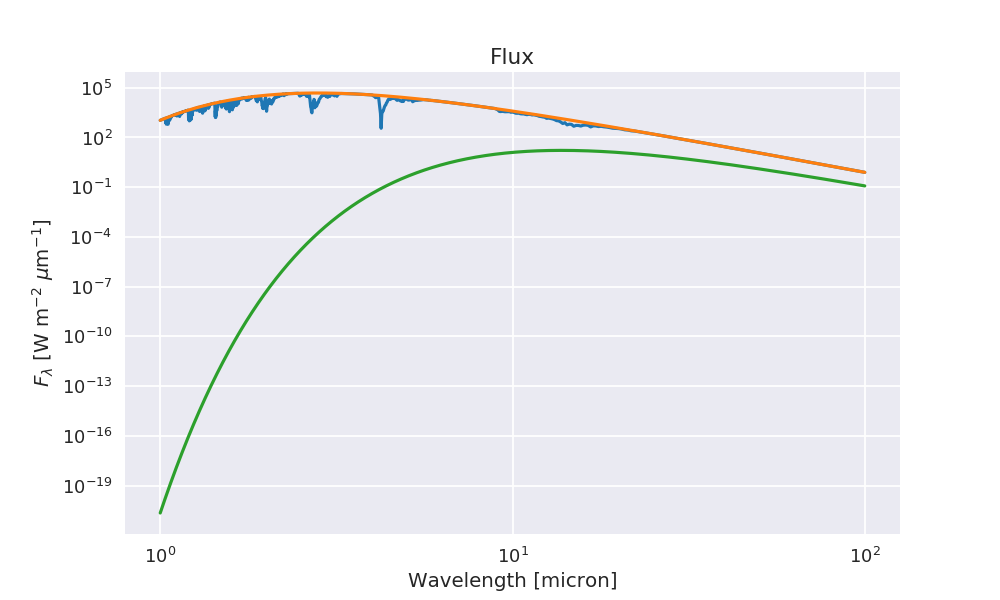

In [53]:
plt.figure(figsize=(10, 6))
plt.loglog(wave_arr, np.pi*intensity, label='Integrated Flux with Opacity')
plt.loglog(wave_arr, np.pi*spec.planck_flux(wave_arr, temp_surf), label='Surface Temperature Blackbody')
plt.loglog(wave_arr, np.pi*spec.planck_flux(wave_arr, skin_temp), label='Skin Temperature Blackbody')
plt.xlabel('Wavelength [micron]')
plt.ylabel(r'$F_\lambda$ [W m$^{-2}$ $\mu$m$^{-1}$]')
plt.title('Flux')

<font color='seagreen'>
### Q2: Pressure and Temperature

We cheated a little bit in our previous example. We assumed $\kappa_\lambda$ was constant everywhere in the atmosphere. In practice, $\kappa_\lambda$ varies with $P$ and $T$. Zoom in around the $15~\mu m$ ro-vibrational band of $CO_2$, and investigate:
+ How do the line shapes vary as you increase the pressure (for instance, between $1-2~atm$)? Explain why, qualitatively.
+ How do the relative strengths of lines change as you increase the temperature (for instance, between $300-400~K$? Explain why, qualitatively.

The following code example shows how to change the $P$ and $T$ at which the absorption coefficients are calculated.

In [ ]:
# include molecule = 2, isotopologue = 1
moleculestoinclude = [(2,1)] 

# what table should the data come from?
tabletouse = 'CO2'

# what range of wavenumbers to consider?
wavenumber_min = 1/(17*u.micron).to('cm').value
wavenumber_max = 1/(13*u.micron).to('cm').value 
minmax_wn = [wavenumber_min, wavenumber_max]

# the "environment" sets the pressure (in atmospheres) and temperature (in K)
env = {'p':1.0, 'T':1000}

# calculate an array of absorption coefficients
wavenumber, crosssection = hapi.absorptionCoefficient(Components=moleculestoinclude, 
                                                      SourceTables=tabletouse,
                                                      WavenumberRange=minmax_wn,
                                                      Environment=env)